<a href="https://colab.research.google.com/github/Ru-Yin/Practice_Leetcode/blob/main/%E3%80%8CTIGP_scikit-learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import** **Library**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# data processing
from sklearn.datasets import load_iris

# model selection
from sklearn.model_selection import train_test_split, cross_val_score

# models
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.svm import SVC

# evaluations
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay




# **Plot** **Function**

In [ ]:
def color_scatter_plot_2d(x, y, label):
    unique_label, label_ids = np.unique(label, return_inverse=True)
    color_map = label_ids / (len(unique_label))
    plt.scatter(x, y, c=plt.cm.jet(color_map))
    for lbl in unique_label:
        x_ = x[label==lbl]
        y_ = y[label==lbl]
        center_x = x_.mean()
        center_y = y_.mean()
        plt.text(center_x, center_y, lbl, bbox=dict(boxstyle="square", facecolor='white'))
    plt.show()


# **Dataset** **Preparing**

In [ ]:
# class 0: setosa; class 1: versicolor; class 2: virginica
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names[iris.target]
print(X.shape)
print(X[0:5,:])
print(labels)


(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'versicolor' 've

We split the data into training set and test set with 0.8, 0.2 ratio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


# **Principle Component Analysis**

Observing training data with PCA

(120, 2)


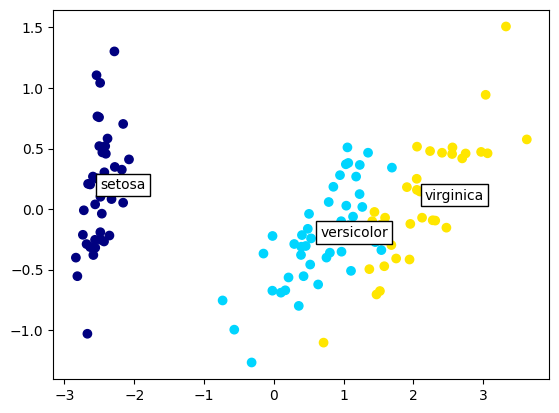

In [ ]:
pca = PCA(n_components=2) # n_components: Number of components to keep
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
print(X_train_pca.shape)

plt.figure(0)
color_scatter_plot_2d(X_train_pca[:,0], X_train_pca[:,1], iris.target_names[y_train])


# **K-Means**

Using KMeans for clustering on **PCA** transformed training data


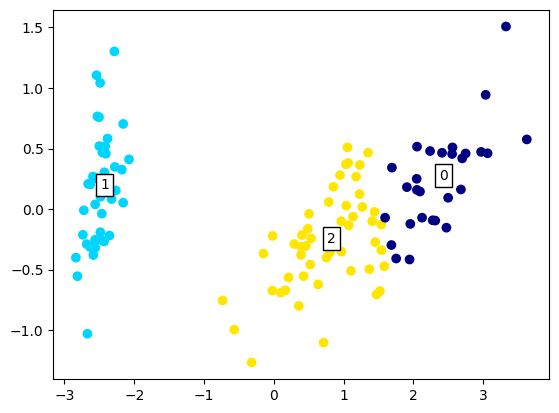

In [ ]:
km = KMeans(n_clusters=3, random_state=42, n_init='auto')
#random_state: Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.
#n_init: Number of times the k-means algorithm is run with different centroid seeds. The final results is the best output of n_init consecutive runs in terms of inertia. Several runs are recommended for sparse high-dimensional problems.
km.fit(X_train_pca)
pred_train_labels = km.predict(X_train_pca)
plt.figure(1)
color_scatter_plot_2d(X_train_pca[:,0], X_train_pca[:,1], pred_train_labels)

# **Evaluate K-means Performance**

Evaluating the performance on test dataset.

Beware, we only transform and predict using test dataset with PCA and KMeans models already fit on training dataset

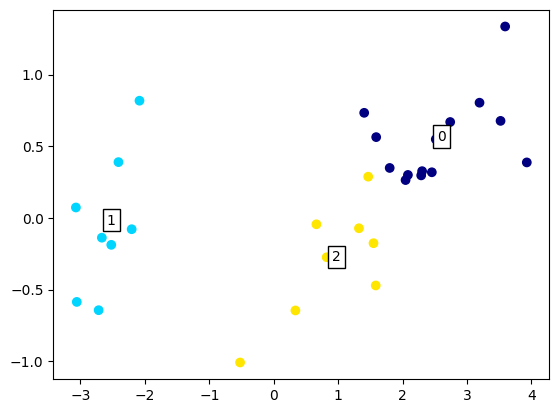

In [ ]:
X_test_pca = pca.transform(X_test)
pred_test_labels = km.predict(X_test_pca)
plt.figure(2)
color_scatter_plot_2d(X_test_pca[:,0], X_test_pca[:,1], pred_test_labels)


# **Decision Tree**

Train a classifier with decision tree

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree = decision_tree.fit(X_train, y_train)
r_tree = export_text(decision_tree, feature_names=iris['feature_names'])
print("The rules of the decision tree are:")
print(r_tree)


The rules of the decision tree are:
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal length (cm) <= 4.75
|   |   |--- class: 1
|   |--- petal length (cm) >  4.75
|   |   |--- class: 2



Evaluate the performance of decision tree on the test set

In [ ]:
y_pred_dt = decision_tree.predict(X_test)
test_acc_dt = accuracy_score(y_test, y_pred_dt)
test_f1_dt = f1_score(y_test, y_pred_dt, average=None)
print('Accuracy (decision tree) = ', test_acc_dt)
print('F1-score (decision tree) = ', test_f1_dt) #score for each class


Accuracy (decision tree) =  0.9333333333333333
F1-score (decision tree) =  [1.         0.83333333 0.9375    ]


# **Support Vector Machine (SVM)**

Train a support vector classifier

In [ ]:
svc_clf = SVC(gamma='auto')
svc_clf = svc_clf.fit(X_train, y_train)


Evaluate the support vector classifier

In [ ]:
y_pred_svc = svc_clf.predict(X_test)
test_acc_svc = accuracy_score(y_test, y_pred_svc)
test_f1_svc = f1_score(y_test, y_pred_svc, average=None)
print('Accuracy (SVC) = ', test_acc_svc)
print('F1-score (SVC) = ', test_f1_svc)


Accuracy (SVC) =  0.9666666666666667
F1-score (SVC) =  [1.         0.93333333 0.96551724]


# **Confusion Matrix**

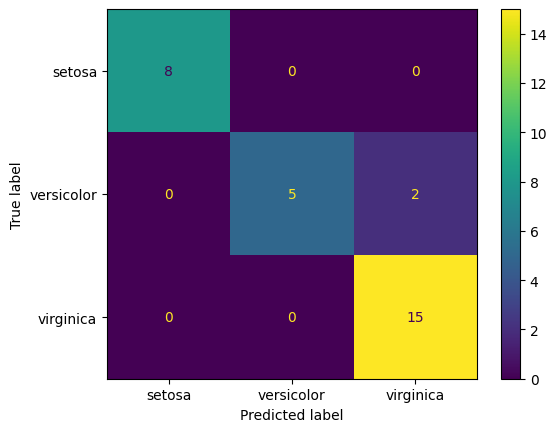

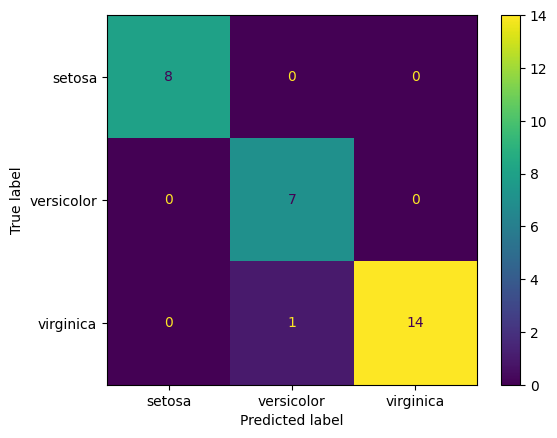

In [ ]:
labels = ('setosa', 'versicolor', 'virginica')
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_svc = confusion_matrix(y_test, y_pred_svc)
# plt.figure(3)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=labels)
disp_dt.plot()

disp_svc = ConfusionMatrixDisplay(confusion_matrix=cm_svc, display_labels=labels)
disp_svc.plot()


# **Cross Validation (CV)**

cross validation accuracies for the decision tree and SVC

In [ ]:
score_dt = cross_val_score(decision_tree, X, y, cv=5)
score_svc = cross_val_score(svc_clf, X, y, cv=5)
print('Accuracies of decision tree: ', score_dt)
print('Accuracies of SVC: ', score_svc)
print('Average accuracy of decision tree: ', np.mean(score_dt))
print('Average accuracy of SVC: ', np.mean(score_svc))


Accuracies of decision tree:  [0.93333333 0.96666667 0.9        0.86666667 1.        ]
Accuracies of SVC:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Average accuracy of decision tree:  0.9333333333333332
Average accuracy of SVC:  0.9800000000000001
